In [6]:
%pylab qt
%matplotlib inline

import pandas
import scipy.constants as cst
import h5py
import matplotlib.colors as mcol
import matplotlib.cm as cm
import io

dpi = 200
def mysavefig(name):
    plt.tight_layout()
    plt.savefig("figures/"+name, bbox_inches="tight", dpi=dpi)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gamma', 'mod']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Mesures interférométriques

In [222]:
def michelson(x):
    return 0.5*(1+np.cos(4*np.pi*x))

def cavity_ref(x):
    return 1 - 1/(1+(2*x*finesse)**2)

def cavity_phase(x):
    return (np.pi/2 + np.angle(1/(1-2*finesse*x*1j)))/np.pi

finesse = 20

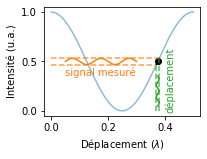

In [223]:
plt.figure(figsize=(2.8,2))

plt.annotate("signal mesuré", (0.05,0.35), color="C1")
plt.annotate("déplacement", (0.4,0.0), rotation=90, color="C2")

plt.xlabel("Déplacement ($\lambda$)")
plt.ylabel("Intensité (u.a.)")


x = np.linspace(0,0.5, 1001)

plt.plot(x, michelson(x), "C0", alpha=0.5)

scale = 0.005
mod_center = 3/8
mod = mod_center + scale*np.sin(5*2*np.pi*x)
sig = michelson(mod)

plt.plot([mod_center], [0.5], "ok")
plt.plot(mod, sig, "k")

plt.plot(0.05+0.5*x, sig, "C1")
plt.plot([0, min(mod)], [min(sig), min(sig)], "--C1", alpha=0.75)
plt.plot([0, max(mod)], [max(sig), max(sig)], "--C1", alpha=0.75)

plt.plot(mod, np.linspace(0.05, 0.35, len(mod)), "C2")
plt.plot([min(mod), min(mod)], [0, min(sig)], "--C2", alpha=0.75)
plt.plot([max(mod), max(mod)], [0, max(sig)], "--C2", alpha=0.75)


plt.yticks([0,0.5,1])
plt.savefig("michelson_response.png", bbox_inches="tight", dpi=200)

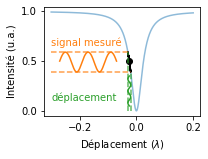

In [224]:
plt.figure(figsize=(2.8,2))

plt.annotate("signal mesuré", (-0.3,0.65), color="C1")
plt.annotate("déplacement", (-0.3,0.1), color="C2")

plt.xlabel("Déplacement ($\lambda$)")
plt.ylabel("Intensité (u.a.)")

x = np.linspace(-0.3, 0.2, 1001)

plt.plot(x, cavity_ref(x), "C0", alpha=0.5)

scale = 0.005
mod_center = -0.5/finesse
mod = mod_center + scale*np.sin(5*2*np.pi*x)
sig = cavity_ref(mod)

plt.plot([mod_center], cavity_ref(mod_center), "ok")
plt.plot(mod, sig, "k")

plt.plot(-0.15+ 0.4*x, sig, "C1")
plt.plot([min(x), max(mod)], [min(sig), min(sig)], "--C1", alpha=0.75)
plt.plot([min(x), min(mod)], [max(sig), max(sig)], "--C1", alpha=0.75)

plt.plot(mod, np.linspace(0.05, 0.35, len(mod)), "C2")
plt.plot([min(mod), min(mod)], [0, max(sig)], "--C2", alpha=0.75)
plt.plot([max(mod), max(mod)], [0, min(sig)], "--C2", alpha=0.75)

plt.yticks([0,0.5,1])
plt.savefig("cavity_intensity_response.png", bbox_inches="tight", dpi=200)

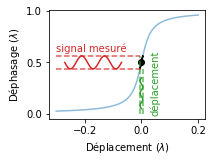

In [225]:
plt.figure(figsize=(2.8,2))

plt.annotate("signal mesuré", (-0.3,0.6), color="C3")
plt.annotate("déplacement", (0.03,0), rotation=90, color="C2")

plt.xlabel("Déplacement ($\lambda$)")
plt.ylabel("Déphasage ($\lambda$)")

x = np.linspace(-0.3, 0.2, 1001)

#plt.plot(x, cavity_ref(x), "C0", alpha=0.15)
plt.plot(x, cavity_phase(x), "C0", alpha=0.5)

scale = 0.005
mod_center = 0
mod = mod_center + scale*np.sin(5*2*np.pi*x)
sig = cavity_phase(mod)

plt.plot([mod_center], cavity_phase(mod_center), "ok")
plt.plot(mod, sig, "k")

plt.plot(-0.15+ 0.4*x, sig, "C3")
plt.plot([min(x), max(mod)], [min(sig), min(sig)], "--C3", alpha=0.75)
plt.plot([min(x), min(mod)], [max(sig), max(sig)], "--C3", alpha=0.75)

plt.plot(mod, np.linspace(0.05, 0.35, len(mod)), "C2")
plt.plot([min(mod), min(mod)], [0, max(sig)], "--C2", alpha=0.75)
plt.plot([max(mod), max(mod)], [0, min(sig)], "--C2", alpha=0.75)

plt.yticks([0,0.5,1])
plt.savefig("cavity_phase_response.png", bbox_inches="tight", dpi=200)

0.8881582338492171
11.308381853189635


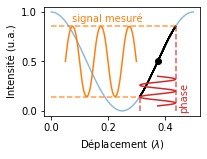

In [227]:
plt.figure(figsize=(2.8,2))

plt.annotate("signal mesuré", (0.075,0.9), color="C1")
plt.annotate("phase", (0.45,0.0), rotation=90, color="C3")

plt.xlabel("Déplacement ($\lambda$)")
plt.ylabel("Intensité (u.a.)")


x = np.linspace(0,0.5, 1001)

plt.plot(x, michelson(x), "C0", alpha=0.5)

scale = 0.005

mod_center = 3/8
mod = mod_center + scale*np.sin(5*2*np.pi*x)
sig = michelson(mod)
a_michelson = (max(sig)-min(sig))/2

mod_center = 0
mod = mod_center + scale*np.sin(5*2*np.pi*x)
newmod = cavity_phase(mod)
mod_center = 3/8
newmod += mod_center-0.5
sig = michelson(newmod)

mod = newmod

plt.plot([mod_center], [0.5], "ok")
plt.plot(mod, sig, "k")

plt.plot(0.05+0.5*x, sig, "C1")
plt.plot([0, min(mod)], [min(sig), min(sig)], "--C1", alpha=0.75)
plt.plot([0, max(mod)], [max(sig), max(sig)], "--C1", alpha=0.75)

plt.plot(mod, np.linspace(0.05, 0.35, len(mod)), "C3")
plt.plot([min(mod), min(mod)], [0, min(sig)], "--C3", alpha=0.75)
plt.plot([max(mod), max(mod)], [0, max(sig)], "--C3", alpha=0.75)


plt.yticks([0,0.5,1])
plt.savefig("michelson_and_cavity_response.png", bbox_inches="tight", dpi=200)

a_cavity = (max(sig)-min(sig))/2
print(a_cavity/a_michelson/(8*finesse/4/np.pi))
print(a_cavity/a_michelson)

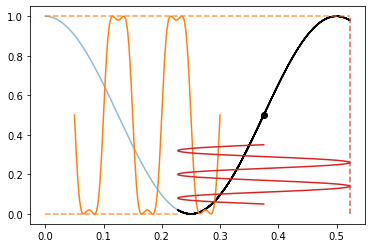

In [120]:
x = np.linspace(0,0.5, 1001)

plt.plot(x, michelson(x), "C0", alpha=0.5)

mod_center = 3/8
newmod = mod_center + sig - 0.5
newsig = michelson(newmod)

plt.plot([mod_center], [0.5], "ok")
plt.plot(newmod, newsig, "k")

plt.plot(0.05+0.5*x, newsig, "C1")
plt.plot([0, min(newmod)], [min(newsig), min(newsig)], "--C1", alpha=0.75)
plt.plot([0, max(newmod)], [max(newsig), max(newsig)], "--C1", alpha=0.75)

plt.plot(newmod, np.linspace(0.05, 0.35, len(newmod)), "C3")
plt.plot([min(newmod), min(newmod)], [0, min(newsig)], "--C3", alpha=0.75)
plt.plot([max(newmod), max(newmod)], [0, max(newsig)], "--C3", alpha=0.75)

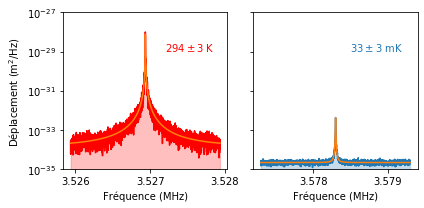

In [4]:
plt.figure(figsize=(6,3))

sps =(1,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))

center = 3.526935e6
span = 2000
calibration_marker_frequency = 3.6e6
calibration_marker_Vpi = 5.89
mass = 33.5e-9

############### 300 K ###############
teff = 293.94

folder = "figures/data/"
filename = "214543.h5"
data     = pandas.read_hdf(folder+filename,'data')
filename = "214544.h5"
fit_data = pandas.read_hdf(folder+filename,'data')

ax1.semilogy(data.index.values*1e-6, data.values, "r")
ax1.semilogy(fit_data.index.values*1e-6, fit_data.values, "C1")
ax1.fill_between(fit_data.index.values*1e-6, 1e-35, fit_data.values, color='r', alpha=0.25)

############### 30 mK ###############
teff = 31.589e-3

filename = "214545.h5"
data     = pandas.read_hdf(folder+filename,'data')
filename = "214546.h5"
fit_data = pandas.read_hdf(folder+filename,'data')

ax2.semilogy(data.index.values*1e-6, data.values)
ax2.semilogy(fit_data.index.values*1e-6, fit_data.values, "C1")
ax2.fill_between(fit_data.index.values*1e-6, 1e-35, fit_data.values, color='C0', alpha=0.25)

for ax in [ax1, ax2]:
    ax.set_ylim(1e-35, 1e-27)
    ax.set_xlabel(u"Fréquence (MHz)")
    
#ax1.set_ylabel(u"Densité spectrale de puissance\ndes fluctuations de position ($\mathrm{m^2/Hz}$)")
ax1.set_ylabel(u"Déplacement ($\mathrm{m^2/Hz}$)")
ax2.set_yticklabels([])
ax1.set_xticks([3.526,3.527,3.528])
ax2.set_xticks([3.578,3.579])

ax1.annotate("$294\pm3$ K", (3.5272, 1e-29), color="r")
ax2.annotate("$33\pm3$ mK", (3.5785, 1e-29), color="C0")

plt.tight_layout()
mysavefig("thermal_peak_def_filled.png")

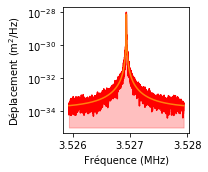

In [7]:
plt.figure(figsize=(3,2.5))

sps =(1,1)
ax1 = plt.subplot2grid(sps, (0,0))

center = 3.526935e6
span = 2000
calibration_marker_frequency = 3.6e6
calibration_marker_Vpi = 5.89
mass = 33.5e-9

############### 300 K ###############
teff = 293.94

folder = "figures/data/"
filename = "214543.h5"
data     = pandas.read_hdf(folder+filename,'data')
filename = "214544.h5"
fit_data = pandas.read_hdf(folder+filename,'data')

ax1.semilogy(data.index.values*1e-6, data.values, "r")
ax1.semilogy(fit_data.index.values*1e-6, fit_data.values, "C1")
ax1.fill_between(fit_data.index.values*1e-6, 1e-35, fit_data.values, color='r', alpha=0.25)
    
#ax1.set_ylabel(u"Densité spectrale de puissance\ndes fluctuations de position ($\mathrm{m^2/Hz}$)")
ax1.set_ylabel(u"Déplacement ($\mathrm{m^2/Hz}$)")
ax1.set_xticks([3.526,3.527,3.528])
ax1.set_xlabel(u"Fréquence (MHz)")

plt.tight_layout()
mysavefig("thermal_peak_filled.png")

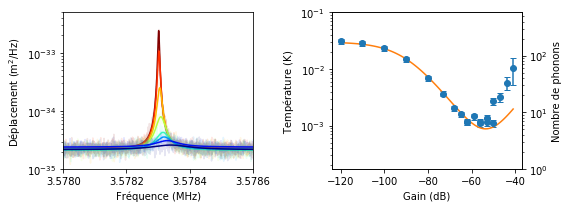

In [9]:
#Calibrated spectra

fig = plt.figure(figsize=(8,3))

f_center = 3.57832e6

sps = (1,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))
#ax1.set_ylabel(u"Densité spectrale de puissance\ndes fluctuations de position ($\mathrm{m^2/Hz}$)")
ax1.set_ylabel(u"Déplacement ($\mathrm{m^2/Hz}$)")
ax1.set_xlabel(u"Fréquence (MHz)")
ax2.set_xlabel(u"Gain (dB)")
ax2.set_ylabel(u"$\\rm{Température \ (K)}$")

ax1.set_ylim(1e-35, 5e-33)
ax1.set_xlim((f_center-250)*1e-6, (f_center+250)*1e-6)
ax1.set_xticks([3.578, 3.5782, 3.5784, 3.5786])

curves_pk = np.array([214557, 214559, 214561, 214563, 214565, 214567, 214569, 214571])
fit_pk    = curves_pk + 1
colormap = plt.cm.jet
colorst = [colormap(i) for i in np.linspace(0, 1, len(curves_pk))][::-1]

folder = "figures/data/"
i=0
for curve, fit in zip(curves_pk, fit_pk):
    filename = str(curve)+".h5"
    data     = pandas.read_hdf(folder+filename,'data')
    filename = str(fit)+".h5"
    fit_data = pandas.read_hdf(folder+filename,'data')
    ax1.semilogy(data.index.values*1e-6, data.values, "-", color=colorst[i], markersize=1, alpha=0.1)
    ax1.semilogy(fit_data.index.values*1e-6, fit_data.values, "-", color=colorst[i])
    i += 1

ax2.set_ylim(1.7e-4, 1e-1)
ax2b = ax2.twinx()
ax2b.set_yscale("log")
ax2b.set_ylim(cst.k*ax2.get_ylim()[0]/cst.hbar/(2.*np.pi*f_center),
              cst.k*ax2.get_ylim()[1]/cst.hbar/(2.*np.pi*f_center))
ax2b.set_ylabel("Nombre de phonons")

filename = "214577.h5"
data     = pandas.read_hdf(folder+filename,'data')
filename = "214578.h5"
model    = pandas.read_hdf(folder+filename,'data')

#ax2.semilogy(data.index.values, data.values, "o")
ax2.errorbar(data.index.values, data.values, yerr=yerr*data.values, fmt="o", capsize=3)
ax2.semilogy(model.index.values, model.values, "-")

plt.tight_layout()
#mysavefig("feedback_cooling_6phonons.png")

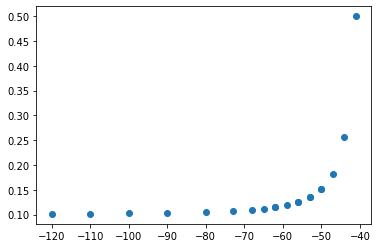

In [8]:
yerr = 0.1 + 10*abs(1/(data.index.values+36)**2)
plt.plot(data.index.values, yerr, "o")

In [9]:
omega = 2*np.pi * 3000e3

tq = cst.hbar * omega / cst.k
print(tq*1e6)

143.97733986634051


# Oscillateur amorti

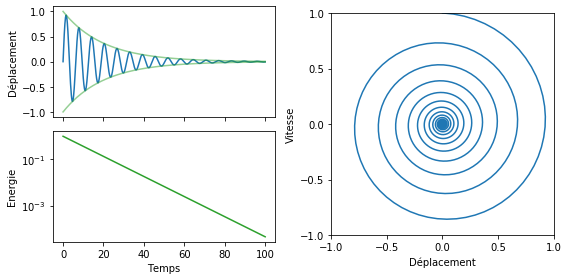

In [76]:
def displacement(t, omega=1, gamma=0.1):
    omega_r = np.sqrt(4*omega**2-gamma**2)/2
    return np.exp(-gamma*t/2)*np.sin(omega_r*t)

def speed(t, omega=1, gamma=0.1):
    omega_r = np.sqrt(4*omega**2-gamma**2)/2
    return np.exp(-gamma*t/2)*np.cos(omega_r*t)

def energy(t, omega=1, gamma=0.1):
    return np.exp(-gamma*t)

plt.figure(figsize=(8,4))
sps = (2,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))
ax3 = plt.subplot2grid(sps, (0,1), rowspan=2)

time = np.linspace(0, 100, 1001)
disp = displacement(time)
spee = speed(time)
ener = energy(time)

ax1.plot(time, disp)
ax1.plot(time, np.sqrt(ener), "-C2", alpha=0.5)
ax1.plot(time, -np.sqrt(ener), "-C2", alpha=0.5)
ax1.set_xticklabels([])
ax1.set_ylabel("Déplacement")

ax2.semilogy(time, ener, "C2")
ax2.set_xlabel("Temps")
ax2.set_ylabel("Energie")

ax3.plot(disp, spee)
ax3.set_xlim(-1,1)
ax3.set_ylim(-1,1)
ax3.set_yticks([-1,-0.5,0,0.5,1])
ax3.set_aspect("equal")
ax3.set_xlabel("Déplacement")
ax3.set_ylabel("Vitesse")

plt.tight_layout()
mysavefig("damped_oscillator.png")

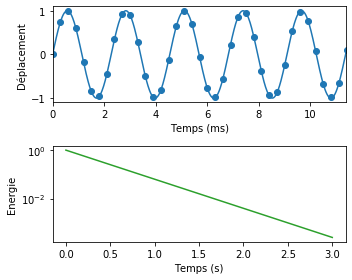

In [89]:
##### Donnée expérimentales sur le diapason #####

omega = 2*np.pi*440
gamma = omega/1000

plt.figure(figsize=(5,4))
sps = (2,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))

time = np.linspace(0, 3, 10001)
x = np.linspace(0, 20, 1001)
disp = displacement(time, omega=omega, gamma=gamma)
spee = speed(time, omega=omega, gamma=gamma)
ener = energy(time, omega=omega, gamma=gamma)

subtime = np.linspace(0, 3, 36)
subdisp = displacement(subtime, omega=omega, gamma=gamma)
subspee = speed(subtime, omega=omega, gamma=gamma)

ax1.plot(time*1e3, disp, "o")
ax1.plot(x, np.sin(omega*x*1e-3), "C0")
ax1.set_xlim(0,5*2*np.pi/omega*1e3)
ax1.set_xlabel("Temps (ms)")
ax1.set_ylabel("Déplacement")

ax2.semilogy(time, ener, "C2")
ax2.set_xlabel("Temps (s)")
ax2.set_ylabel("Energie")

plt.tight_layout()
mysavefig("diapason.png")

In [91]:
1000/440

2.272727272727273

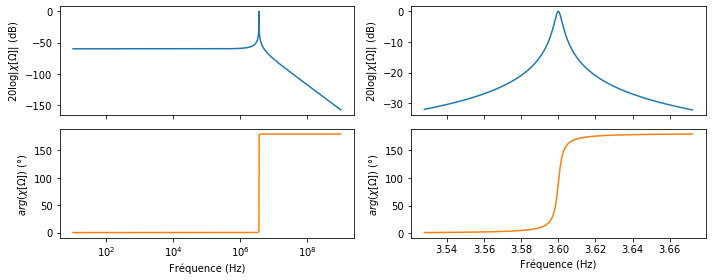

In [142]:
def chi(omega, omega0, gamma, m):
    return 1/m * (omega0**2-omega**2-1j*gamma*omega)**-1

def lorentz(omega, omega0, gamma, m):
    return 1/m**2/gamma**2/omega0**2 * (1 + (2*(omega-omega0)/gamma)**2)**-1

def update(omega):
    susc  = chi(omega, omega0, gamma, m)
    mod   = np.abs(susc)
    phi   = np.angle(susc)
    app   = lorentz(omega, omega0, gamma, m)
    scale = 1/m**2/gamma**2/omega0**2
    return [susc, mod, phi, app, scale]

plt.figure(figsize=(10,4))
sps = (2,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))
ax3 = plt.subplot2grid(sps, (0,1))
ax4 = plt.subplot2grid(sps, (1,1))

omega0 = 2*np.pi*3.6e6
gamma  = omega0/1e3
m      = 33.5e-9

omega = np.logspace(1,9,100001)*2*np.pi
susc, mod, phi, app, scale = update(omega)

ax1.semilogx(omega/2/np.pi, 20*np.log10(mod/np.sqrt(scale)), "-C0")

ax2.semilogx(omega/2/np.pi, phi*180/np.pi, "-C1")

omega = np.linspace(omega0-20*gamma,omega0+20*gamma,1001)
susc, mod, phi, app, scale = update(omega)

ax3.plot(omega/2/np.pi*1e-6, 20*np.log10(mod/np.sqrt(scale)), "-C0")
#ax3.plot(omega/2/np.pi*1e-6, 10*np.log10(app/scale), "-C2")

ax4.plot(omega/2/np.pi*1e-6, phi*180/np.pi, "-C1")

for ax in [ax1, ax3]:
    ax.set_xticklabels([])
    ax.set_ylabel("$20\log |\chi[\Omega]|$ (dB)")

    
for ax in [ax2, ax4]:
    ax.set_xlabel("Fréquence (Hz)")
    ax.set_ylabel("$arg(\chi[\Omega])$ (°)")
    
plt.tight_layout()
mysavefig("mechanical_susceptibility.png")

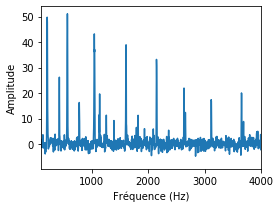

In [164]:
def read_file(folder, filename):
    s = open(folder+filename).read().replace(',','.')
    data = np.loadtxt(io.StringIO(s), skiprows=1)
    f, db = [], []
    for r in data:
        f.append(r[0])
        db.append(r[1])
    f = np.array(f)
    db = np.array(db)
    return f, db
                
folder = "C:/Users/Remi/Documents/GitHub/agregation/MEPD/figures/data/glass/"
sample = "spectre"

filenamedata = sample+".txt"
filenamenoise = "noise.txt"

f, dn = read_file(folder, filenamenoise)
f, db = read_file(folder, filenamedata)

plt.figure(1, figsize=(4, 3))
ax = plt.subplot2grid((1,1), (0,0))
plt.plot(f, (db-dn), "-")

plt.xlim(1e2, 4e3)
plt.xlabel(u"Fréquence (Hz)")
plt.ylabel("Amplitude")

mysavefig("glass_modes.png")

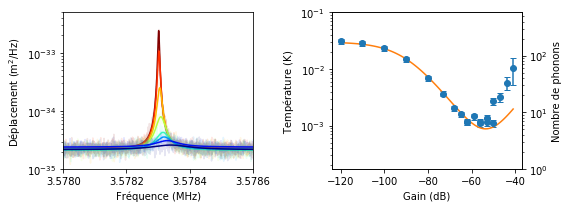

In [13]:
#Calibrated spectra

fig = plt.figure(figsize=(8,3))

f_center = 3.57832e6

sps = (1,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))
#ax1.set_ylabel(u"Densité spectrale de puissance\ndes fluctuations de position ($\mathrm{m^2/Hz}$)")
ax1.set_ylabel(u"Déplacement ($\mathrm{m^2/Hz}$)")
ax1.set_xlabel(u"Fréquence (MHz)")
ax2.set_xlabel(u"Gain (dB)")
ax2.set_ylabel(u"$\\rm{Température \ (K)}$")

ax1.set_ylim(1e-35, 5e-33)
ax1.set_xlim((f_center-250)*1e-6, (f_center+250)*1e-6)
ax1.set_xticks([3.578, 3.5782, 3.5784, 3.5786])

curves_pk = np.array([214557, 214559, 214561, 214563, 214565, 214567, 214569, 214571])
fit_pk    = curves_pk + 1
colormap = plt.cm.jet
colorst = [colormap(i) for i in np.linspace(0, 1, len(curves_pk))][::-1]

ax2.set_ylim(1.7e-4, 1e-1)
ax2b = ax2.twinx()
ax2b.set_yscale("log")
ax2b.set_ylim(cst.k*ax2.get_ylim()[0]/cst.hbar/(2.*np.pi*f_center),
              cst.k*ax2.get_ylim()[1]/cst.hbar/(2.*np.pi*f_center))
ax2b.set_ylabel("Nombre de phonons")

filename = "214577.h5"
data     = pandas.read_hdf(folder+filename,'data')
filename = "214578.h5"
model    = pandas.read_hdf(folder+filename,'data')

#ax2.semilogy(data.index.values, data.values, "o")
yerr = 0.1 + 10*abs(1/(data.index.values+36)**2)
ax2.errorbar(data.index.values, data.values, yerr=yerr*data.values, fmt="o", capsize=3)
ax2.semilogy(model.index.values, model.values, "-")

folder = "figures/data/"
i=0
for curve, fit in zip(curves_pk, fit_pk):
    filename = str(curve)+".h5"
    data     = pandas.read_hdf(folder+filename,'data')
    filename = str(fit)+".h5"
    fit_data = pandas.read_hdf(folder+filename,'data')
    ax1.semilogy(data.index.values*1e-6, data.values, "-", color=colorst[i], markersize=1, alpha=0.1)
    ax1.semilogy(fit_data.index.values*1e-6, fit_data.values, "-", color=colorst[i])
    mysavefig("feedback_cooling_6phonons_"+str(i)+".png")
    i += 1

plt.tight_layout()
#mysavefig("feedback_cooling_6phonons.png")

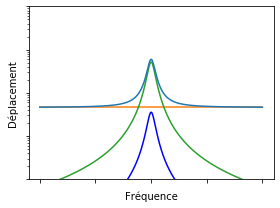

In [38]:
##### SQL #####

def I(P, wavelength=1064e-9):
    nu = cst.c/wavelength
    return P/cst.h/nu

def phase_noise(P,F, wavelength=1064e-9):
    return wavelength/16./F/np.sqrt(I(P, wavelength=wavelength))

def Sxx_phase(P,F, wavelength=1064e-9):
    return (phase_noise(P,F, wavelength=wavelength))**2

def chi(f, m=33.5e-9, f0=3.6e6, Q=1e6):
    omega0 = 2.*np.pi*f0
    omega = 2.*np.pi*f
    gamma = omega0/Q
    return 1./m/((omega0**2-omega**2)-1j*gamma*omega)

def Sxx_ampl(f, P, F, wavelength=1064e-9, m=33.5e-9, f0=3.6e6, Q=1e6):
    omega = 2.*np.pi*f
    return 64.*cst.hbar**2*F**2*np.abs(chi(f, m=m, f0=f0, Q=Q))**2*I(P, wavelength=wavelength)/wavelength**2

def thermal_peak(f, m=33.5e-9, f0=3.6e6, Q=1e6, T=00.):
    omega0 = 2.*np.pi*f0
    omega = 2.*np.pi*f
    gamma = omega0/Q
    return 2.*cst.k*T*gamma/m/((omega0**2-omega**2)**2+gamma**2*omega**2)

## Rugar
def Sxx(f, m=33.5e-9, f0=3.6e6, Q=1e6, T=300., Sxn=0., g=0.):
    omega0 = 2.*np.pi*f0
    omega = 2.*np.pi*f
    gamma = omega0/Q
    susc = 1./((omega0**2-omega**2)**2+(1.+g)**2*gamma**2*omega**2)
    thermal = 2.*cst.k*T*gamma/m
    noise = g**2*gamma**2*omega**2*Sxn
    return susc*(thermal+noise)

def Sxx_meas(f, m=33.5e-9, f0=3.6e6, Q=1e6, T=300., Sxn=0., g=0.):
    omega0 = 2.*np.pi*f0
    omega = 2.*np.pi*f
    gamma = omega0/Q
    susc = 1./((omega0**2-omega**2)**2+(1.+g)**2*gamma**2*omega**2)
    thermal = 2.*cst.k*T*gamma/m
    noise = ((omega0**2-omega**2)**2+gamma**2*omega**2)*Sxn
    return susc*(thermal+noise)

fig = plt.figure(figsize=(4,3))
sps = (1,1)
ax = plt.subplot2grid(sps, (0,0))

Tenv = 30e-3
T    = 10e-6
f0 = 3.6e6
meff = 33.5e-9
Q = 0.5e6
F = 60e3
span = 200.
f = np.linspace(f0-span/2., f0+span/2, 1001)
x = (f-f0)
P = 0.5e-6
Sxn = Sxx_phase(P,F)
omega0 = 2.*np.pi*f0
gamma = omega0/Q
g=10

y_thermal = thermal_peak(f, m=meff, f0=f0, Q=Q, T=T)
y_phase = Sxx_phase(P,F)*np.ones(len(x))
y_rad = Sxx_ampl(f, P, F, m=meff, f0=f0, Q=Q)
y_real_rug = Sxx(f, m=meff, f0=f0, Q=Q, T=Tenv, Sxn=Sxn, g=g)
y_meas_rug = Sxx_meas(f, m=meff, f0=f0, Q=Q, T=Tenv, Sxn=Sxn, g=g)

#ax.fill_between(x, 0, y, where=y >= 0, facecolor="C0", alpha=0.2, interpolate=True)
ax.semilogy(x, y_phase, "-C1")
ax.semilogy(x, y_rad, "-C2")
ax.semilogy(x, y_thermal, "-b")
#ax.semilogy(x, y_thermal, "-C0")
ax.semilogy(x, y_thermal+y_rad+y_phase, "-C0")
ax.set_ylim(1e-38, 1e-34)
ax.set_xlabel(u"Fréquence")
ax.set_ylabel(u"Déplacement")
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.tight_layout()

mysavefig("qsn_thermal_noise_qnoises_cooled.png")

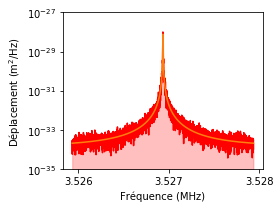

In [5]:
plt.figure(figsize=(4,3))

sps =(1,1)
ax1 = plt.subplot2grid(sps, (0,0))

center = 3.526935e6
span = 2000
calibration_marker_frequency = 3.6e6
calibration_marker_Vpi = 5.89
mass = 33.5e-9

############### 300 K ###############
teff = 293.94

folder = "figures/data/"
filename = "214543.h5"
data     = pandas.read_hdf(folder+filename,'data')
filename = "214544.h5"
fit_data = pandas.read_hdf(folder+filename,'data')

ax1.semilogy(data.index.values*1e-6, data.values, "r")
ax1.semilogy(fit_data.index.values*1e-6, fit_data.values, "C1")
ax1.fill_between(fit_data.index.values*1e-6, 1e-35, fit_data.values, color='r', alpha=0.25)
    
#ax1.set_ylabel(u"Densité spectrale de puissance\ndes fluctuations de position ($\mathrm{m^2/Hz}$)")
ax1.set_ylabel(u"Déplacement ($\mathrm{m^2/Hz}$)")
ax1.set_xticks([3.526,3.527,3.528])
ax1.set_xlabel(u"Fréquence (MHz)")

plt.ylim(1e-35, 1e-27)

plt.tight_layout()
mysavefig("thermal_peak_filled_ppt.png")

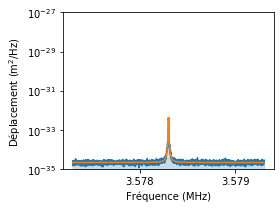

In [10]:
plt.figure(figsize=(4,3))

sps =(1,1)
ax1 = plt.subplot2grid(sps, (0,0))

center = 3.526935e6
span = 2000
calibration_marker_frequency = 3.6e6
calibration_marker_Vpi = 5.89
mass = 33.5e-9

############### 30 mK ###############
teff = 31.589e-3

folder = "figures/data/"
filename = "214545.h5"
data     = pandas.read_hdf(folder+filename,'data')
filename = "214546.h5"
fit_data = pandas.read_hdf(folder+filename,'data')

ax1.semilogy(data.index.values*1e-6, data.values)
ax1.semilogy(fit_data.index.values*1e-6, fit_data.values, "C1")
ax1.fill_between(fit_data.index.values*1e-6, 1e-35, fit_data.values, color='C0', alpha=0.25)

for ax in [ax1]:
    ax.set_ylim(1e-35, 1e-27)
    ax.set_xlabel(u"Fréquence (MHz)")
    
#ax1.set_ylabel(u"Densité spectrale de puissance\ndes fluctuations de position ($\mathrm{m^2/Hz}$)")
ax1.set_ylabel(u"Déplacement ($\mathrm{m^2/Hz}$)")
ax1.set_xticks([3.578,3.579])
#ax1.annotate("$33\pm3$ mK", (3.5785, 1e-29), color="C0")
ax1.set_xlabel(u"Fréquence (MHz)")

plt.tight_layout()
mysavefig("thermal_peak_filled_cold.png")

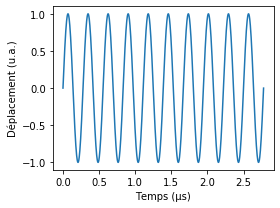

In [12]:
plt.figure(figsize=(4,3))

sps =(1,1)
ax = plt.subplot2grid(sps, (0,0))

f = 3.6e6
t = np.linspace(0, 10/f, 1001)
ax.plot(t*1e6, np.sin(2*np.pi*f*t))

ax.set_xlabel("Temps (µs)")
ax.set_ylabel("Déplacement (u.a.)")

mysavefig("fake_pillar.png")

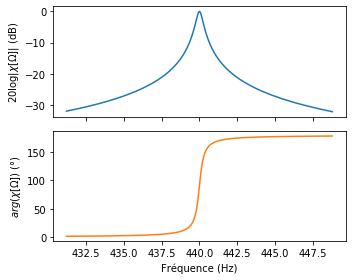

In [4]:
def chi(omega, omega0, gamma, m):
    return 1/m * (omega0**2-omega**2-1j*gamma*omega)**-1

def lorentz(omega, omega0, gamma, m):
    return 1/m**2/gamma**2/omega0**2 * (1 + (2*(omega-omega0)/gamma)**2)**-1

def update(omega):
    susc  = chi(omega, omega0, gamma, m)
    mod   = np.abs(susc)
    phi   = np.angle(susc)
    app   = lorentz(omega, omega0, gamma, m)
    scale = 1/m**2/gamma**2/omega0**2
    return [susc, mod, phi, app, scale]

plt.figure(figsize=(5,4))
sps = (2,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))

omega0 = 2*np.pi*440
gamma  = omega0/1e3
m      = 33.5e-9

omega = np.linspace(omega0-20*gamma,omega0+20*gamma,1001)
susc, mod, phi, app, scale = update(omega)

ax1.plot(omega/2/np.pi, 20*np.log10(mod/np.sqrt(scale)), "-C0")
#ax1.plot(omega/2/np.pi, 10*np.log10(app/scale), "-C2")

ax2.plot(omega/2/np.pi, phi*180/np.pi, "-C1")

for ax in [ax1]:
    ax.set_xticklabels([])
    ax.set_ylabel("$20\log |\chi[\Omega]|$ (dB)")

    
for ax in [ax2]:
    ax.set_xlabel("Fréquence (Hz)")
    ax.set_ylabel("$arg(\chi[\Omega])$ (°)")
    
plt.tight_layout()
mysavefig("mechanical_susceptibility_res.png")

In [22]:
np.sqrt(2*33.5e-9 / 2.6e3/np.pi/1e-3)

9.056821138345221e-05

In [11]:
##### Fluctuatations de point zéro 
np.sqrt(cst.hbar/2/33.5e-9/2/np.pi/3.6e6)

8.341794580990969e-18

In [23]:
np.pi*(50e-6)**2*7e-6*2e3

1.0995574287564274e-10